In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import fastai
from fastai.vision import *
from fastai.vision.all import *
from fastai.metrics import error_rate
from fastai.imports import *


#pred,prex_idx, probs  =('liquid', tensor(1), tensor([0.0036, 0.9562, 0.0402]))

In [ ]:
path1 = Path('/gdrive/My Drive/Tank_Height_Identifier')
print(path1)
TrainDataPath = path1/'Height_TrainSet'
print(TrainDataPath)

/gdrive/My Drive/Tank_Height_Identifier
/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet


In [ ]:
batch_tfms = [ IntToFloatTensor(), Normalize.from_stats(*imagenet_stats) ]

data = ImageDataLoaders.from_folder(TrainDataPath, train=".", valid_pct=0.2, ds_tfms=batch_tfms, item_tfms=Resize(224))

In [ ]:
data

In [ ]:
print(len(data.valid_ds.items))
print(len(data.train_ds.items))


16
65


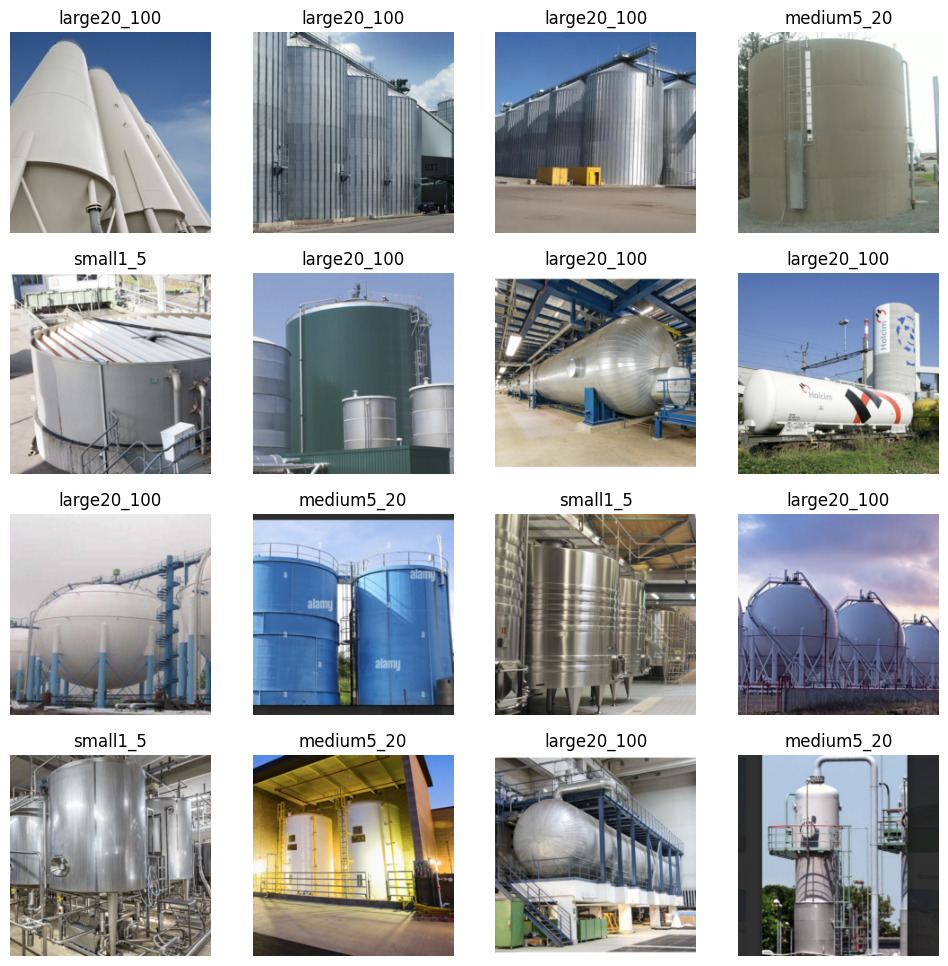

In [ ]:
data.show_batch(max_n=16)

In [ ]:
learn = vision_learner(data, resnet18, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 103MB/s]


In [ ]:
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.215196,3.380973,0.687500,00:16


epoch,train_loss,valid_loss,error_rate,time
0,1.938534,2.899469,0.687500,00:05
1,1.668559,2.244743,0.687500,00:04
2,1.355196,1.793027,0.562500,00:04


In [ ]:
learn.fine_tune(3)
learn.save('res18-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.554622,1.596825,0.500000,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.563322,1.434260,0.500000,00:04
1,0.602377,1.254480,0.500000,00:05
2,0.493933,1.110612,0.437500,00:04


Path('/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet/models/res18-2.pth')

In [ ]:
learn.fine_tune(5)
learn.save('res18-3')

epoch,train_loss,valid_loss,error_rate,time
0,0.248998,1.002883,0.437500,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.288050,1.004253,0.375000,00:04
1,0.262780,1.041293,0.375000,00:04
2,0.204221,1.094275,0.375000,00:06
3,0.169325,1.103892,0.437500,00:04
4,0.142338,1.067297,0.437500,00:04


Path('/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet/models/res18-3.pth')

In [ ]:
learn.fine_tune(5)
learn.save('res18-4')

epoch,train_loss,valid_loss,error_rate,time
0,0.084493,1.015042,0.375000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.074436,0.975441,0.312500,00:05
1,0.067319,0.994579,0.312500,00:04
2,0.053825,0.982067,0.312500,00:05
3,0.048810,0.972983,0.312500,00:06
4,0.044367,0.951705,0.250000,00:04


Path('/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet/models/res18-4.pth')

In [ ]:
learn.fine_tune(5)
learn.save('res18-5')


epoch,train_loss,valid_loss,error_rate,time
0,0.005840,0.929260,0.250000,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.011030,0.946129,0.250000,00:05
1,0.013806,1.008774,0.312500,00:04
2,0.010527,1.022682,0.312500,00:05
3,0.008155,1.008972,0.250000,00:04
4,0.007129,0.988383,0.250000,00:04


Path('/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet/models/res18-5.pth')

In [ ]:
learn.export(path1/'models/prodModel1')


In [ ]:
learn.fine_tune(5)
learn.save('res18-6')

epoch,train_loss,valid_loss,error_rate,time
0,0.003740,0.962639,0.187500,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.003945,0.981050,0.187500,00:04
1,0.002635,1.080828,0.250000,00:07
2,0.002064,1.314914,0.312500,00:04
3,0.002586,1.325886,0.250000,00:04
4,0.003131,1.318987,0.250000,00:05


Path('/gdrive/My Drive/Tank_Height_Identifier/Height_TrainSet/models/res18-6.pth')

In [ ]:
testImgPath = path1/'test_set'
testImgPath

Path('/gdrive/My Drive/Tank_Height_Identifier/test_set')

In [ ]:
!ls '/gdrive/My Drive/Tank_Height_Identifier/test_set'

midhigh.jpg  small.jpg	testtankGas.jpg


In [ ]:
learn.predict(testImgPath/'testtankGas.jpg')

('large20_100', tensor(0), tensor([0.8039, 0.1142, 0.0819]))

In [ ]:
learn.predict(testImgPath/'midhigh.jpg')

('medium5_20', tensor(1), tensor([2.0379e-06, 9.9998e-01, 1.6958e-05]))

In [ ]:
learn.predict(testImgPath/'small.jpg')

('small1_5', tensor(2), tensor([0.1576, 0.1147, 0.7277]))

In [ ]:
prod_models_path = path1/'models'
prod_models_path


Path('/gdrive/My Drive/Tank_Height_Identifier/models')

In [ ]:
!ls '/gdrive/My Drive/Tank_Height_Identifier/models'

prodHeightModel1  prodHeightModel2


**prodHeightModel1**

In [ ]:
## prodHeightModel1
prod_model = load_learner( prod_models_path/'prodHeightModel1')

In [ ]:
prod_model.predict(testImgPath/'small.jpg')

('small1_5', tensor(2), tensor([0.1472, 0.1582, 0.6946]))

In [ ]:
prod_model.predict(testImgPath/'midhigh.jpg')

('medium5_20', tensor(1), tensor([2.6671e-06, 9.9997e-01, 2.6697e-05]))

In [ ]:
prod_model.predict(testImgPath/'testtankGas.jpg')

('large20_100', tensor(0), tensor([0.7071, 0.1871, 0.1057]))



**prodHeightModel2**



In [ ]:
## prodHeightModel2
prod_model2 = load_learner( prod_models_path/'prodHeightModel2')

In [ ]:
prod_model2.predict(testImgPath/'midhigh.jpg')

('medium5_20', tensor(1), tensor([2.0379e-06, 9.9998e-01, 1.6958e-05]))

In [ ]:
prod_model2.predict(testImgPath/'testtankGas.jpg')

('large20_100', tensor(0), tensor([0.8039, 0.1142, 0.0819]))

In [ ]:
prod_model2.predict(testImgPath/'small.jpg')

('small1_5', tensor(2), tensor([0.1576, 0.1147, 0.7277]))